# Avocado Data Analysis


## Business Understanding

The aim of this project is to answer the following four questions:
    >1. Which region are the lowest and highest prices of Avocado?
    >2. What is the highest region of avocado production?
    >3. What is the average avocado prices in each year?
    >4. What is the average avocado volume in each year?

## Data Understanding

The [Avocado dataset](https://www.kaggle.com/neuromusic/avocado-prices) was been used in this project.

This dataset contains 13 columns:
    1. Date - The date of the observation
    2. AveragePrice: the average price of a single avocado
    3. Total Volume: Total number of avocados sold
    4. Total Bags: Total number  of bags
    5. Small Bags: Total number of Small bags
    6. Large Bags: Total number of Large bags
    7. XLarge Bags: Total number of XLarge bags
    8. type: conventional or organic
    9. year: the year
    10. region: the city or region of the observation
    11. 4046: Total number of avocados with PLU 4046 sold
    12. 4225: Total number of avocados with PLU 4225 sold
    13. 4770: Total number of avocados with PLU 4770 sold


### Import Necessary Liabraries

In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

## Data preparation


### Load data

In [53]:
avo_sales = pd.read_csv(r"C:\Users\akaft\OneDrive\Desktop\NIT@AFTAB\Classroom\APRIL@2025\NON_LINEAR_ALGORITHM\2nd- REGRESSION PROJECT\2nd- REGRESSION PROJECT\RESUME PROJECT -- PRICE PREDICTION\avocado.csv")

In [54]:
avo_sales.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avo_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Missing values Checking

In [5]:
avo_sales.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Mising values count

In [6]:
avo_sales.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Dropping unnecessary columns

In [7]:
avo_sales = avo_sales.drop(["Unnamed: 0","4046","4225","4770","Date"],axis=1)

In [8]:
avo_sales.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Answering Questions

In [9]:
def get_average(avo_sales,column):
    """
    Description: This function to return the average value of the column
    
    Arguments:
         avo_sales: the DataFrame
         column: the selected column.
    Returns:
        column's average
    """ 
    return sum(avo_sales[column])/len(avo_sales)

get_average(avo_sales,"AveragePrice")

1.405978409775878

In [10]:
def get_average_between_two_columns(avo_sales,column1,column2):
    """
    Description:The function calculate the average between two columns in the dataset
    
    Arguments:
        avo_sales: the DataFrame.
        column1:the first column.
        column2:the second column.
    Returns:
        Sorted data for relation between column1 and column2
    """ 
    
    List=list(avo_sales[column1].unique())
    average=[]
    
    for i in List:
        x=avo_sales[avo_sales[column1]==i]
        column1_average=get_average(x,column2)
        average.append(column1_average)
        
    avo_sales_column1_column2=pd.DataFrame({"column1":List,"column2":average})
    column1_column2_sorted_index=avo_sales_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=avo_sales_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

avg=get_average_between_two_columns(avo_sales,"Total Volume","Total Bags")
print(avg)

           column1      column2
9096   62505646.52  19373134.37
9089   43409835.75  16394524.11
8365   61034457.10  16298296.29
9090   41386314.12  15972492.07
8352   47293921.60  15804696.31
...            ...          ...
11387     46229.47         0.00
11319     12642.11         0.00
11596      4436.79         0.00
11347     26530.70         0.00
11661      3795.21         0.00

[18237 rows x 2 columns]


In [11]:
def get_average_between_two_columns(avo_sales, column1, column2):
    return avo_sales.groupby(column1)[column2].mean().sort_values(ascending=False).reset_index()

get_average_between_two_columns(avo_sales, "Total Volume", "Total Bags")


,Total Volume,Total Bags
0,62505646.52,19373134.37
1,43409835.75,16394524.11
2,61034457.10,16298296.29
3,41386314.12,15972492.07
4,47293921.60,15804696.31
...,...,...
18232,41116.32,0.00
18233,19558.81,0.00
18234,14031.73,0.00
18235,12642.11,0.00


In [12]:
avg.head()


,column1,column2
9096,62505646.52,19373134.37
9089,43409835.75,16394524.11
8365,61034457.10,16298296.29
9090,41386314.12,15972492.07
8352,47293921.60,15804696.31


In [13]:
avo_sales.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
def plot(data, xlabel, ylabel):
    """
    Description: The function to draw a barplot

    Arguments:
        avo_sales: The DataFrame
        xlabel: The label of the x-axis column
        ylabel: The label of the y-axis column

    Returns:
        None
    """
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x="region", y="AveragePrice", data=avo_sales, palette="rocket")
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Average of {ylabel} of Avocado According to {xlabel}")
    plt.show()
    
#plot(avo_sales,xlabel="region",ylabel="AveragePrice")

### Which region are the lowest and highest prices of Avocado?

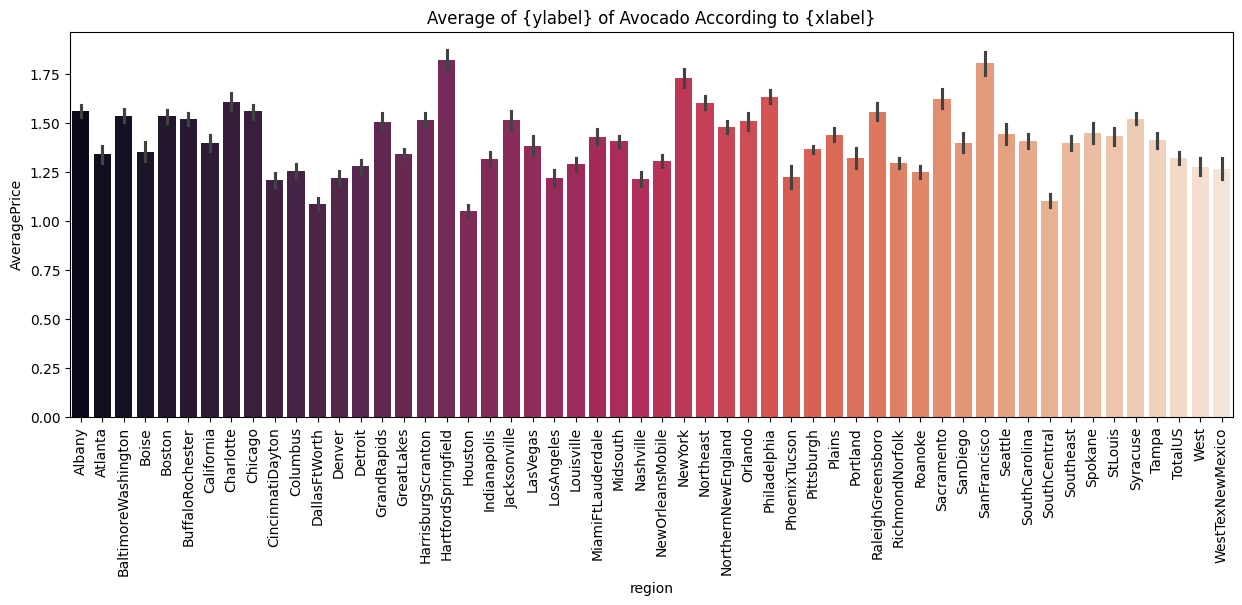

In [15]:
data1 = get_average_between_two_columns(avo_sales, "region", "AveragePrice")
plot(data1, xlabel="region", ylabel="AveragePrice")


In [16]:
print(data1['region'].iloc[-1], " is the region producing avocado with the lowest price.")


Houston  is the region producing avocado with the lowest price.


### What is the highest region of avocado production?

#### Checking if there are outlier values or not.

Text(0.5, 1.0, 'Figure: Boxplot representing outlier columns.')

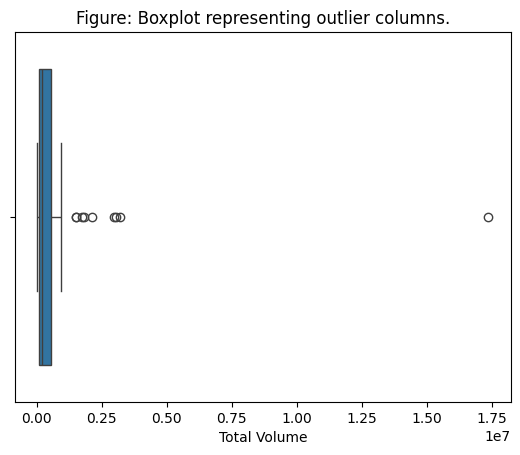

In [17]:
data2=get_average_between_two_columns(avo_sales,"region","Total Volume")
sns.boxplot(x=data2["Total Volume"]).set_title("Figure: Boxplot representing outlier columns.")

In [18]:
data2

,region,Total Volume
0,TotalUS,1.735130e+07
1,West,3.215323e+06
2,California,3.044324e+06
3,SouthCentral,2.991952e+06
4,Northeast,2.110299e+06
5,Southeast,1.820232e+06
6,GreatLakes,1.744505e+06
7,Midsouth,1.503992e+06
8,LosAngeles,1.502653e+06
9,Plains,9.206761e+05


In [19]:
outlier_region=data2[data2["Total Volume"]>10000000]
print(outlier_region["region"].iloc[-1],"is outlier value")

TotalUS is outlier value


#### Remove the outlier values

In [20]:
outlier_region.index
data2=data2.drop(outlier_region.index,axis=0)

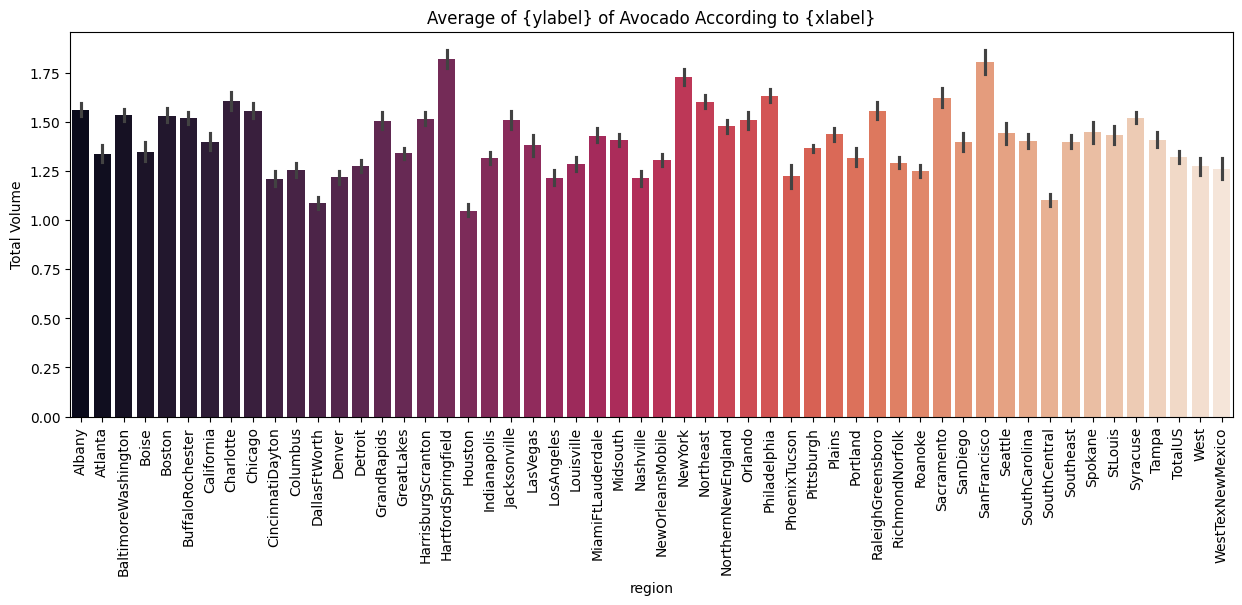

In [21]:
plot(data2,"region","Total Volume")

In [22]:
def plot(data, xlabel, ylabel):
    """
    Description: The function to draw a barplot

    Arguments:
        avo_sales: The DataFrame
        xlabel: The label of the x-axis column
        ylabel: The label of the y-axis column

    Returns:
        None
    """
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x="year", y="AveragePrice", data=avo_sales, palette="rocket")
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("AveragePric of Avocado According to year")
    plt.show()
    
#plot(avo_sales,xlabel="region",ylabel="AveragePrice")

### What is the average avocado prices in each year?


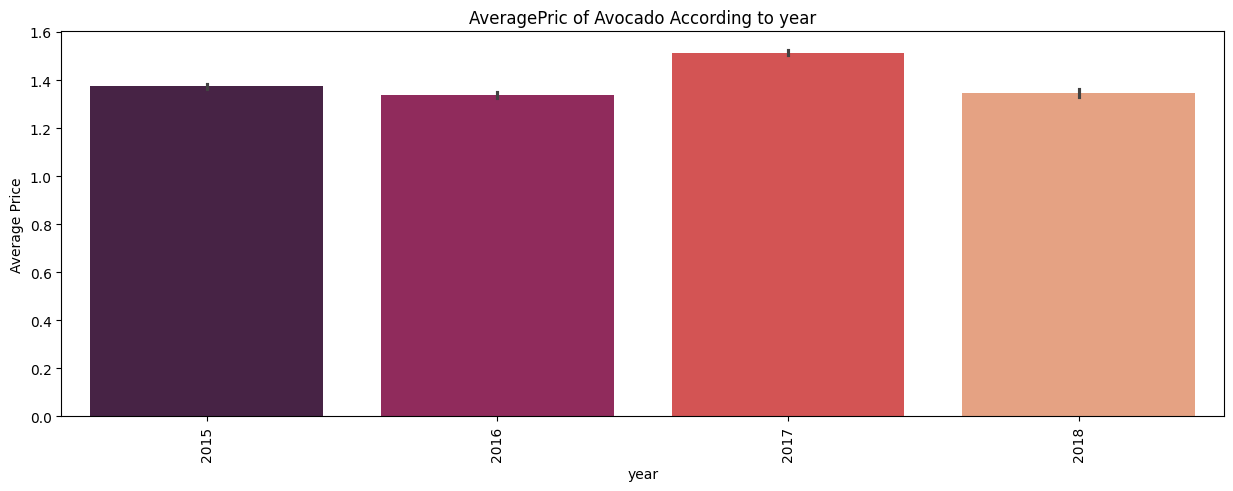

In [26]:
data3=get_average_between_two_columns(avo_sales,"year","AveragePrice")
plot(data3,"year","Average Price")

### What is the average avocado volume in each year?

In [31]:
def plot(data, xlabel, ylabel):
    """
    Description: The function to draw a barplot

    Arguments:
        avo_sales: The DataFrame
        xlabel: The label of the x-axis column
        ylabel: The label of the y-axis column

    Returns:
        None
    """
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x="year", y="Total Volume", data=avo_sales, palette="rocket")
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("AveragePric of Avocado volume According to year")
    plt.show()
    
#plot(avo_sales,xlabel="region",ylabel="AveragePrice")

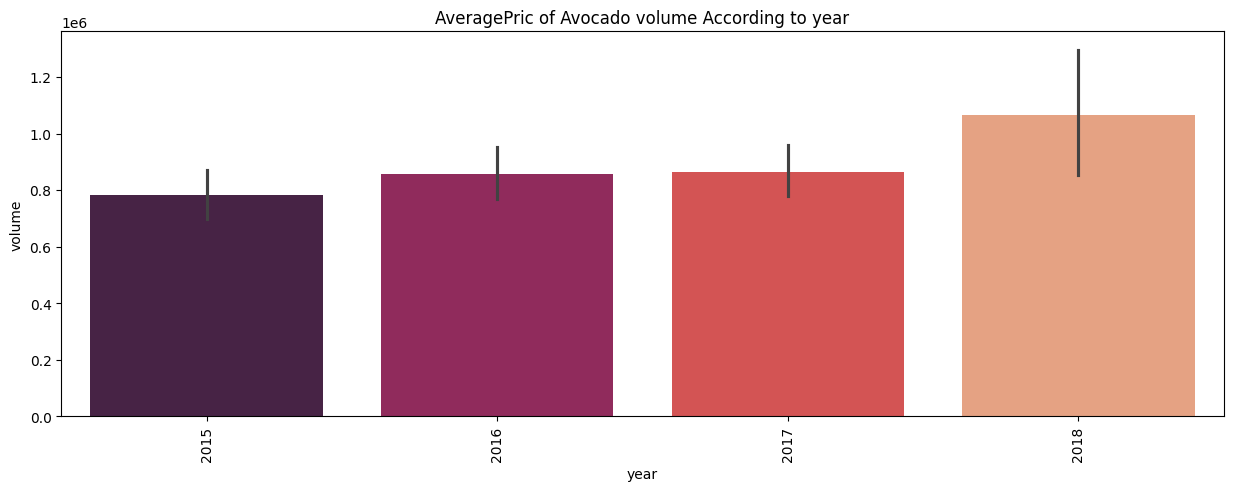

In [33]:
data4=get_average_between_two_columns(avo_sales,"year","Total Volume")
plot(data4,"year","volume")

In [24]:
data3

,year,AveragePrice
0,2017,1.515128
1,2015,1.375590
2,2018,1.347531
3,2016,1.338640


In [25]:
avo_sales["year"]

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
18244    2018
18245    2018
18246    2018
18247    2018
18248    2018
Name: year, Length: 18249, dtype: int64

## DATA MODELING

We bulit the regrestion model by used [Linear regresion from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to predict the avocado price.

### Changing some column types to categories

In [35]:
avo_sales["region"] =avo_sales["region"].astype("category")
avo_sales["region"]=avo_sales["region"].cat.codes

avo_sales["type"]=avo_sales["type"].astype("category")
avo_sales["type"]=avo_sales["type"].cat.codes

In [36]:
avo_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [39]:
avo_sales.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [43]:
#Split data into x and y

x=avo_sales.drop(["AveragePrice"],axis=1)
y=avo_sales["AveragePrice"]

#Split data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [45]:
print("training set:",x_train.shape,"-",y_train.shape[0],"samples")
print("testing set:",x_test.shape,"-",y_test.shape[0],"samples")

training set: (12774, 8) - 12774 samples
testing set: (5475, 8) - 5475 samples


In [55]:
#Built and Fit the model

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## Evalute The Results

### Prediction and calculate the accuracy for the testing dataset

In [ ]:
test_pre = model.predict(x_test)
test_score=r2_score(y_test,test_pre)
print("The accuracy of testing datset",test_score*100)

The accuracy of testing datset 38.580741764818185


### Predict and calculate the accuracy for the training dataset

In [61]:
train_pre=model.predict(x_train)
train_score=r2_score(y_train,train_pre)
print("The accuracy of training dataset",train_score*100)

The accuracy of training dataset 39.7068604241095


In [62]:
print(y_train.var())


0.16196607292596302


The model doesn't work well with this dataset, In order to the avocado prices were near together.